In this project, I collected news headlines from https://www.myanmar-now.org/en/news, from Feb to Dec 2021, to analyze news topics in the first year after the military coup in Myanmar.

I plotted the number of articles published per month to see what months were most eventful, and what events were deemed newsworthy. I also created a wordcloud to analyze what words were most often featured in the news headlines. To extract meaningful words out of all the most featured words, I created a frequency dictionary without stopwords.

Initial conclusions: 
Mandalay and Sagaing, two locations in upper Myanmar were featured more often in news headlines than Yangon, the old capital of Myanmar in the south, which has the highest number of urban population. This reaffirms that most of the junta soldiers' attacks on civilians had been concentrated in rural areas in upper Myanmar (in the Mandalay/Sagaing region). 

Things I'd like to improve:
Currently, the data is based on news articles that I downloaded, so it's static and not easily scalable. 
I also hard coded the page numbers to be downloaded (from 40 to 150) because those were the page numbers from when I collected this data. But as this website adds more news to its page, these page numbers will no longer be accurate. Need to fix the "for i in range (40,150)" to make the data replicable. 

In [2]:
import requests
import os
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
# download webpages of most read news articles from Feb 2021-Dec 2021

if not os.path.exists("MMN_mostread"):
    os.mkdir("MMN_mostread")
    
    for i in range(40, 150): 
        url = f"https://www.myanmar-now.org/en/most-read?page={i}"
        response = requests.get(url)
        response.raise_for_status()
        
        with open(os.path.join("MMN_mostread", str(i)+".html"), "w", encoding="utf-8") as f:
            f.write(response.text)

In [4]:
# convert each html page to df
def html_to_df(path):

    with open(path, encoding="utf-8") as f:
        html = f.read()
    soup = BeautifulSoup(html)
    data = {}
    news_titles = [title.text.strip() for title in soup.find_all('div', class_ = 'news-title')]
    pub_dates = [date['content'].split('T')[0] for date in soup.find_all('span', class_ = 'date-display-single')]
    data['title'] = news_titles[1:] #removing the highlighted article on each page because it's repeated
    data['date'] = pub_dates[1:]
    
    return pd.DataFrame(data, columns = data.keys())

# append all the dfs into one big df

dfs = []
for i in range(40, 150): 
    df = html_to_df(os.path.join('MMN_mostread', str(i)+'.html'))
    dfs.append(df)
    
big_df = pd.concat(dfs, ignore_index=True)

pd.set_option("display.max_colwidth", None) 
big_df.head()

,title,date
0,More Magway villagers fall victim to marauding regime forces,2022-01-03
1,Junta forces and military-backed armed group terrorise Sagaing residents,2022-01-03
2,Junta township chair killed by guerrilla force’s bomb in Sagaing,2022-01-03
3,"NLD leaders, student activists receive prison sentences in year-end blitz",2021-12-31
4,Cruelty for its own sake: How Myanmar’s junta uses torture as a tool of oppression,2021-12-31


In [5]:
# convert my date values from string into datetime object
big_df['date'] = pd.to_datetime(big_df.date, format='%Y-%m-%d')
big_df.head()

,title,date
0,More Magway villagers fall victim to marauding regime forces,2022-01-03
1,Junta forces and military-backed armed group terrorise Sagaing residents,2022-01-03
2,Junta township chair killed by guerrilla force’s bomb in Sagaing,2022-01-03
3,"NLD leaders, student activists receive prison sentences in year-end blitz",2021-12-31
4,Cruelty for its own sake: How Myanmar’s junta uses torture as a tool of oppression,2021-12-31


### Cleaning the dataset to only include news articles from Feb-Dec 2021

In [6]:
# drop the three articles from Jan 2022
df_2021 = big_df.drop([0,1,2])
df_2021 = df_2021.reset_index()
df_2021 = df_2021.drop(columns=['index'])
df_2021.head()

,title,date
0,"NLD leaders, student activists receive prison sentences in year-end blitz",2021-12-31
1,Cruelty for its own sake: How Myanmar’s junta uses torture as a tool of oppression,2021-12-31
2,Resumed clashes near Mongko leave at least a dozen junta soldiers dead,2021-12-31
3,Junta issues order to ignore notifications from international courts,2021-12-30
4,"Junta statement ‘full of lies’, says KNU spokesperson",2021-12-30


In [7]:
df_2021.tail()

,title,date
1312,Aung San Suu Kyi and ousted president Win Myint charged under laws that carry three-year sentences,2021-02-03
1313,Myanmar descends back into dictatorship as military declares state of emergency,2021-02-01
1314,Suu Kyi calls for public resistance against coup,2021-02-01
1315,Domestic election observers urge all parties to accept result of vote,2021-01-30
1316,Tanks appear on city streets as fears of a possible coup continue,2021-01-29


In [8]:
df_2021 = df_2021.drop([1315, 1316])
df_2021.tail()

,title,date
1310,Three Saffron Revolution monks among those detained in February 1 raids,2021-02-03
1311,Veteran activist calls for civil disobedience in wake of coup,2021-02-03
1312,Aung San Suu Kyi and ousted president Win Myint charged under laws that carry three-year sentences,2021-02-03
1313,Myanmar descends back into dictatorship as military declares state of emergency,2021-02-01
1314,Suu Kyi calls for public resistance against coup,2021-02-01


### Plotting number of articles published by month in 2021

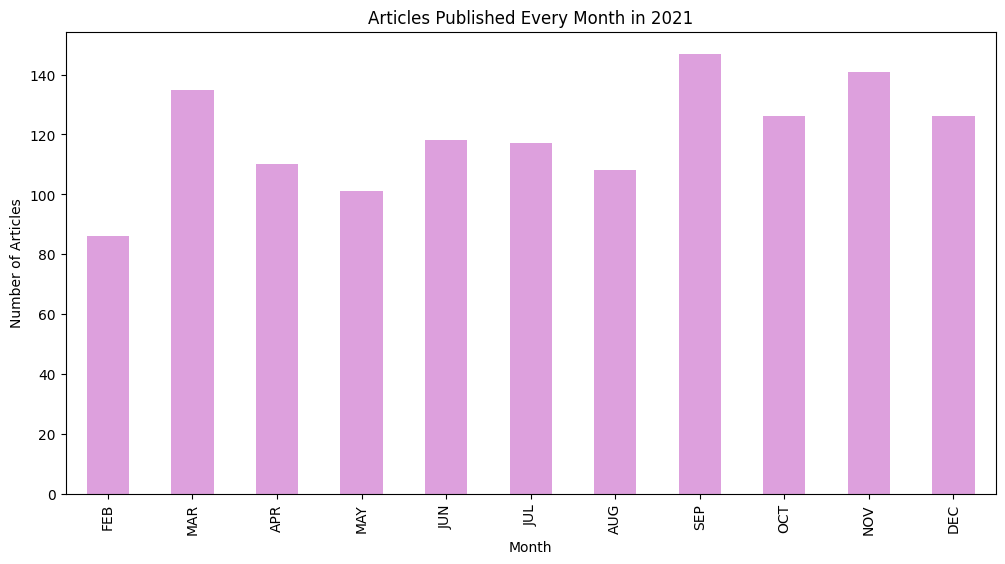

In [9]:
ax = df_2021.groupby(df_2021.date.dt.month)['title'].count().plot(kind='bar', figsize=(12, 6), color='plum')
months = ['FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
ax.set_xticklabels(months)
ax.set(xlabel='Month', ylabel='Number of Articles', title="Articles Published Every Month in 2021")
plt.show()

In [10]:
df_2021['date'].value_counts().head(10)

2021-11-09    9
2021-10-07    8
2021-03-17    8
2021-10-26    8
2021-09-10    8
2021-09-02    8
2021-09-08    8
2021-10-05    8
2021-11-08    7
2021-11-10    7
Name: date, dtype: int64

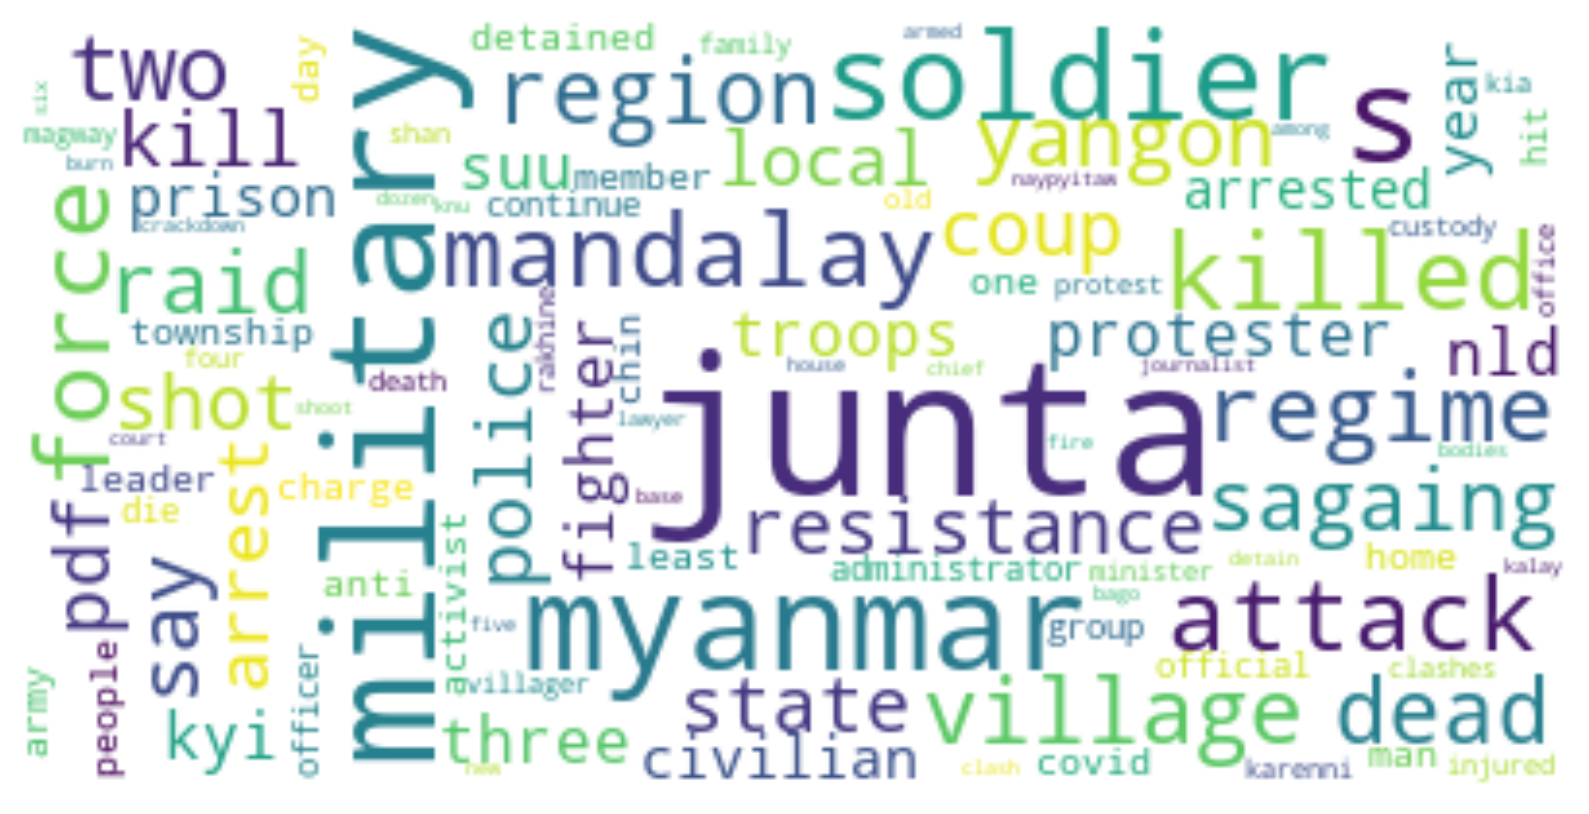

In [11]:
#max_font_size=50, max_words=100
text = " ".join(title.lower() for title in df_2021['title'])
word_cloud = WordCloud(max_font_size=50, max_words=100, collocations = False, background_color = 'white').generate(text)

from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=200)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [153]:
word_cloud.to_file("MMN_mostread\keywords_whitebg.png")

### Create a dictionary pairing words to their frequencies

In [12]:
# make a giant string 
s0 = ""
for title in df_2021['title']:
    s0 += ' '+ title.lower()
s0 = s0.strip()

# make a list with tuples, each tuple is (word,fq)
frequency = []
word_ls = s0.split(' ')
for w in word_ls:
    frequency.append(word_ls.count(w))
    
word_fq = list(zip(word_ls, frequency))

# convert this list into a dict
freqdict = dict(word_fq)

# sort this dict
def sortSecond(val):
    return val[1]
word_to_fq = [(key, freqdict[key]) for key in freqdict]
word_to_fq.sort(key = sortSecond, reverse = True)

word_to_fq

[('in', 750),
 ('to', 346),
 ('junta', 324),
 ('of', 321),
 ('military', 203),
 ('as', 167),
 ('and', 166),
 ('on', 160),
 ('soldiers', 134),
 ('myanmar', 126),
 ('after', 118),
 ('for', 117),
 ('with', 113),
 ('mandalay', 102),
 ('by', 102),
 ('killed', 102),
 ('the', 100),
 ('at', 98),
 ('two', 90),
 ('a', 80),
 ('regime', 80),
 ('region', 76),
 ('dead', 75),
 ('forces', 74),
 ('resistance', 73),
 ('from', 72),
 ('sagaing', 70),
 ('police', 70),
 ('yangon', 69),
 ('state', 65),
 ('shot', 65),
 ('village', 64),
 ('pdf', 62),
 ('raid', 59),
 ('more', 57),
 ('against', 56),
 ('attack', 55),
 ('suu', 54),
 ('troops', 52),
 ('nld', 51),
 ('fighters', 50),
 ('three', 48),
 ('says', 47),
 ('protesters', 45),
 ('during', 44),
 ('attacks', 43),
 ('arrested', 42),
 ('myanmar’s', 41),
 ('chin', 41),
 ('one', 41),
 ('detained', 41),
 ('kill', 40),
 ('prison', 39),
 ('township', 39),
 ('covid-19', 38),
 ('least', 37),
 ('man', 37),
 ('army', 36),
 ('coup', 36),
 ('who', 34),
 ('kyi', 34),
 ('junt

In [13]:
# removing stopwords from the dict
stopwords = ['a', 'about', 'as', 'at', 'against', 'across', 'after', 'by', 'in', 'on', 'to', 'the', 'of', 'and', 'for', 'from', 'with']

d1 = dict(word_to_fq)
for k in list(d1.keys()):
    if k in stopwords:
        del d1[k]
        
d1

{'junta': 324,
 'military': 203,
 'soldiers': 134,
 'myanmar': 126,
 'mandalay': 102,
 'killed': 102,
 'two': 90,
 'regime': 80,
 'region': 76,
 'dead': 75,
 'forces': 74,
 'resistance': 73,
 'sagaing': 70,
 'police': 70,
 'yangon': 69,
 'state': 65,
 'shot': 65,
 'village': 64,
 'pdf': 62,
 'raid': 59,
 'more': 57,
 'attack': 55,
 'suu': 54,
 'troops': 52,
 'nld': 51,
 'fighters': 50,
 'three': 48,
 'says': 47,
 'protesters': 45,
 'during': 44,
 'attacks': 43,
 'arrested': 42,
 'myanmar’s': 41,
 'chin': 41,
 'one': 41,
 'detained': 41,
 'kill': 40,
 'prison': 39,
 'township': 39,
 'covid-19': 38,
 'least': 37,
 'man': 37,
 'army': 36,
 'coup': 36,
 'who': 34,
 'kyi': 34,
 'junta’s': 33,
 'people': 32,
 'local': 32,
 'his': 31,
 'arrest': 31,
 'say': 30,
 'than': 29,
 'villagers': 29,
 'over': 29,
 'dies': 28,
 'civilians': 28,
 'leader': 28,
 'custody': 27,
 'arrests': 26,
 'their': 26,
 'locals': 25,
 'up': 25,
 'force': 25,
 'charges': 25,
 'minister': 24,
 'family': 24,
 'under': 2